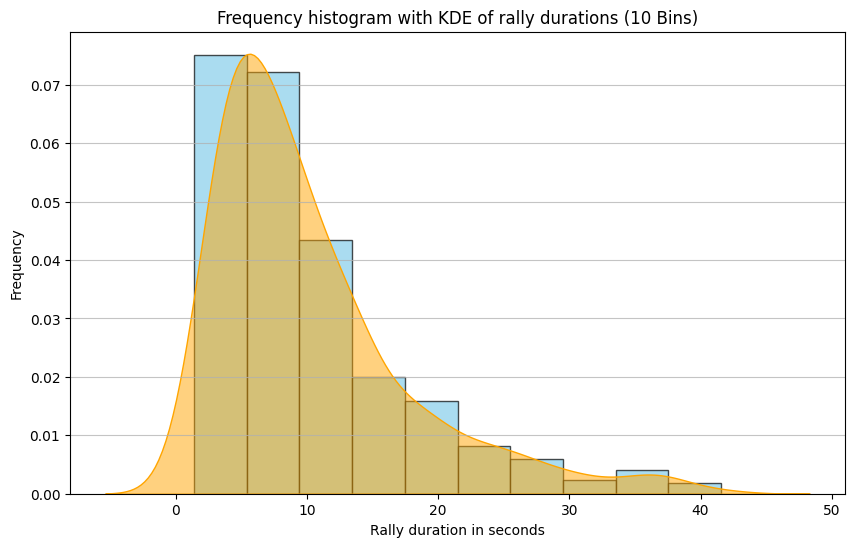

max value:  41.56666666666667


99.05660377358491

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better visualization

def find_files(directory, filename):
    result = []
    # Walk through directory and subdirectories
    for root, dirs, files in os.walk(directory):
        # Check if filename is in the list of files
        if filename in files:
            result.append(os.path.join(root, filename))
    return result

# Example usage
directory = '../data/badminton_training_full_match/raw'  # The directory to search in
filename = 'RallySeg.csv'
files_found = find_files(directory, filename)
df_total = None
for file in files_found:
    df = pd.read_csv(file)
    if df_total is None:
        df_total = df
    else: 
        df_total = pd.concat([df_total, df])
fps = 30
df_total['duration'] = (df_total['End']  -  df_total['Start'] + 1) / fps 

# Sample list of numbers (replace with your own data)
rally_durations_in_seconds = df_total['duration'].values

# Plot the absolute frequency histogram with 10 bins
plt.figure(figsize=(10, 6))
plt.hist(rally_durations_in_seconds, bins=10, edgecolor='black', color='skyblue', alpha=0.7, density=True)
sns.kdeplot(rally_durations_in_seconds, color='orange', fill=True, alpha=0.5)
plt.title('Frequency histogram with KDE of rally durations (10 Bins)')
plt.xlabel('Rally duration in seconds')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)  # Add grid lines for better readability
plt.show()

def percentage_smaller_than(a, n):
    # Count how many elements in the array are smaller than n
    count_smaller = sum(1 for x in a if x < n)

    # Calculate the percentage
    percentage = (count_smaller / len(a)) * 100 if len(a) > 0 else 0  # Prevent division by zero

    return percentage
max_value = max(rally_durations_in_seconds)
print('max value: ', max_value)
percentage_smaller_than(rally_durations_in_seconds, 37)

In [2]:
df_total

,Score,UpCourt,DownCourt,Start,End,Comment,duration
0,1_01_00,An Se Young,PUSARLA V. Sindhu,10585,10817,0,7.766667
1,1_02_00,An Se Young,PUSARLA V. Sindhu,11179,11426,0,8.266667
2,1_03_00,An Se Young,PUSARLA V. Sindhu,11796,13042,0,41.566667
3,1_03_01,An Se Young,PUSARLA V. Sindhu,13676,13929,0,8.466667
4,1_04_01,An Se Young,PUSARLA V. Sindhu,14512,14794,0,9.433333
...,...,...,...,...,...,...,...
99,3_18_08,Anthony Sinisuka GINTING,Anders ANTONSEN,128859,128909,0,1.700000
100,3_19_08,Anthony Sinisuka GINTING,Anders ANTONSEN,129208,129409,0,6.733333
101,3_20_08,Anthony Sinisuka GINTING,Anders ANTONSEN,129810,129970,0,5.366667
102,3_20_09,Anthony Sinisuka GINTING,Anders ANTONSEN,130354,130434,1,2.700000


In [11]:
import json

# Load the JSON data from a file
with open('../data/badminton_training_full_match/badminton_img10fps_info.json', 'r') as file:
    data = json.load(file)

# Extract feature lengths
feature_lengths = [info['feature_length'] for info in data.values()]

# Calculate shortest, longest, and average
shortest = min(feature_lengths)
longest = max(feature_lengths)
average = sum(feature_lengths) / len(feature_lengths)

# Convert to minutes
shortest_minutes = shortest / 60 / 10
longest_minutes = longest / 60 / 10
average_minutes = average / 60 / 10

# Print results
print(f"Shortest: {shortest_minutes:.2f} minutes")
print(f"Longest: {longest_minutes:.2f} minutes")
print(f"Average: {average_minutes:.2f} minutes")

Shortest: 57.67 minutes
Longest: 99.66 minutes
Average: 72.44 minutes
